In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
import ast

In [52]:
programms_df = pd.read_csv('data//degrees/programme_data_NDC.csv')
modules_df  = pd.read_csv('data//modules/modul_key_facts_updated.csv')

In [54]:
programms_df.head()

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,nr_applications,intake,ratio,home_fee,median_salary
0,BA Anthropology and Law,AAB,NaN,"['LL141', 'AN100', 'AN101', 'LL142', 'LL108', ...","['AN253', 'AN379', 'LL106', 'LL143', 'LL200']",['LL276'],250.0,20,13:1,"£9,535","£34,500"
1,BA Geography,AAA,NaN,"['GY100', 'GY140', 'GY144', 'LSE100']","['GY245', 'GY246', 'GY212']",['GY350'],377.0,38,10:1,"£9,535","£35,000"
2,BA History,AAA,NaN,"['HY120', 'LSE100']",[],['HY300'],503.0,58,9:1,"£9,535","£35,000"
3,BA Social Anthropology,AAB,NaN,"['AN100', 'AN101', 'AN102', 'LSE100']",['AN286'],['AN397'],232.0,30,8:1,"£9,535","£34,500"
4,BSc Accounting and Finance,AAA,with A in Mathematics,"['LSE100', 'AC105', 'AC106', 'ST107', 'FM101']","['AC205', 'AC206']","['AC331', 'AC311', 'FM310', 'FM311']",2283.0,140,16:1,"£9,535","£35,000"


In [56]:
programms_df.isnull().sum()

degree              0
a_lvl_req           0
a_lvl_extra        17
modules_y1          0
modules_y2          0
modules_y3          0
nr_applications     2
intake              2
ratio               2
home_fee            1
median_salary       3
dtype: int64

In [58]:
programms_df_clean = programms_df

In [60]:
programms_df_clean['a_lvl_extra'] = programms_df_clean['a_lvl_extra'].fillna('None')

print("Missing values in 'a_lvl_extra' after replacement:")
print(programms_df_clean['a_lvl_extra'].isnull().sum())

Missing values in 'a_lvl_extra' after replacement:
0


In [62]:
programms_df_clean.dropna(subset=['median_salary'], inplace=True)

print("Remaining missing values:\n", programms_df_clean.isnull().sum())

Remaining missing values:
 degree             0
a_lvl_req          0
a_lvl_extra        0
modules_y1         0
modules_y2         0
modules_y3         0
nr_applications    2
intake             2
ratio              2
home_fee           0
median_salary      0
dtype: int64


In [64]:
programms_df_clean['intake'] = programms_df_clean['intake']\
    .astype(str)\
    .str.replace(r'[^\d.]', '', regex=True)
programms_df_clean['nr_applications'] = programms_df_clean['nr_applications']\
    .astype(str)\
    .str.replace(r'[^\d.]', '', regex=True)

programms_df_clean['intake'] = pd.to_numeric(
    programms_df_clean['intake'], errors='coerce'
)
programms_df_clean['nr_applications'] = pd.to_numeric(
    programms_df_clean['nr_applications'], errors='coerce'
)

In [66]:
programms_df_clean['acceptance_perc'] = (programms_df_clean['intake']/programms_df_clean['nr_applications']).round(5)
programms_df_clean.head(3)

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,nr_applications,intake,ratio,home_fee,median_salary,acceptance_perc
0,BA Anthropology and Law,AAB,None,"['LL141', 'AN100', 'AN101', 'LL142', 'LL108', ...","['AN253', 'AN379', 'LL106', 'LL143', 'LL200']",['LL276'],250.0,20.0,13:1,"£9,535","£34,500",0.08000
1,BA Geography,AAA,None,"['GY100', 'GY140', 'GY144', 'LSE100']","['GY245', 'GY246', 'GY212']",['GY350'],377.0,38.0,10:1,"£9,535","£35,000",0.10080
2,BA History,AAA,None,"['HY120', 'LSE100']",[],['HY300'],503.0,58.0,9:1,"£9,535","£35,000",0.11531


In [68]:
programms_df_clean['median_salary'] = programms_df_clean['median_salary'].str.replace(',', '').str.replace('£', '').astype(float)

In [70]:
columns_to_drop = ['nr_applications', 'intake', 'ratio', 'home_fee']
programms_df_clean.drop(columns=columns_to_drop, inplace=True)
programms_df_clean.head(3)

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,median_salary,acceptance_perc
0,BA Anthropology and Law,AAB,None,"['LL141', 'AN100', 'AN101', 'LL142', 'LL108', ...","['AN253', 'AN379', 'LL106', 'LL143', 'LL200']",['LL276'],34500.0,0.08000
1,BA Geography,AAA,None,"['GY100', 'GY140', 'GY144', 'LSE100']","['GY245', 'GY246', 'GY212']",['GY350'],35000.0,0.10080
2,BA History,AAA,None,"['HY120', 'LSE100']",[],['HY300'],35000.0,0.11531


In [72]:
modules_df.head(3)

,code,course,department,total_students,avg_class_size,capped,units
0,AC102,Elements of Financial Accounting,Accounting,564.0,15.0,False,0.5
1,AC103,"Elements of Management Accounting, Financial M...",Accounting,256.0,18.0,False,0.5
2,AC105,Introduction to Financial Accounting,Accounting,115.0,39.0,False,0.5


In [74]:
module_units_dict = modules_df.set_index('code')['units'].to_dict()
def parse_module_list(module_string):
    try:
        if isinstance(module_string, str):
            parsed_list = ast.literal_eval(module_string)
            return parsed_list if isinstance(parsed_list, list) else []
        elif isinstance(module_string, list):
             return module_string
        else:
            return []
    except (ValueError, SyntaxError, TypeError):
        return []


programms_df_clean['modules_y1'] = programms_df_clean['modules_y1'].apply(parse_module_list)
programms_df_clean['modules_y2'] = programms_df_clean['modules_y2'].apply(parse_module_list)
programms_df_clean['modules_y3'] = programms_df_clean['modules_y3'].apply(parse_module_list)

programms_df_clean.head(3)

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,median_salary,acceptance_perc
0,BA Anthropology and Law,AAB,None,"[LL141, AN100, AN101, LL142, LL108, LL100, LL1...","[AN253, AN379, LL106, LL143, LL200]",[LL276],34500.0,0.08000
1,BA Geography,AAA,None,"[GY100, GY140, GY144, LSE100]","[GY245, GY246, GY212]",[GY350],35000.0,0.10080
2,BA History,AAA,None,"[HY120, LSE100]",[],[HY300],35000.0,0.11531


In [94]:
def calculate_total_units(df, module_col_name, units_dict):
    total_units_list = []
    warnings_issued = set() 

    for modules in df[module_col_name]:
        programm_unit_sum = 0
        if isinstance(modules, list): 
            for module in modules:
                unit_value = units_dict.get(module, 0)

                if module not in units_dict and module not in warnings_issued:
                     warnings_issued.add(module)
                    
                programm_unit_sum += unit_value

        total_units_list.append(programm_unit_sum)

    return total_units_list

y1_unit_sums = calculate_total_units(programms_df_clean, 'modules_y1', module_units_dict)
programms_df_clean['y1_total_units'] = y1_unit_sums

y2_unit_sums = calculate_total_units(programms_df_clean, 'modules_y2', module_units_dict)
programms_df_clean['y2_total_units'] = y2_unit_sums

y3_unit_sums = calculate_total_units(programms_df_clean, 'modules_y3', module_units_dict)
programms_df_clean['y3_total_units'] = y3_unit_sums

programms_df_clean.head(5)

,degree,a_lvl_req,a_lvl_extra,modules_y1,modules_y2,modules_y3,median_salary,acceptance_perc,y1_total_units,y2_total_units,y3_total_units,total_compulsory_units,total_optional_units
0,BA Anthropology and Law,AAB,None,"[LL141, AN100, AN101, LL142, LL108, LL100, LL1...","[AN253, AN379, LL106, LL143, LL200]",[LL276],34500.0,0.08000,4.5,3.0,1.0,8.5,4.0
1,BA Geography,AAA,None,"[GY100, GY140, GY144, LSE100]","[GY245, GY246, GY212]",[GY350],35000.0,0.10080,3.5,1.5,1.0,6.0,6.5
2,BA History,AAA,None,"[HY120, LSE100]",[],[HY300],35000.0,0.11531,1.5,0.0,1.0,2.5,10.0
3,BA Social Anthropology,AAB,None,"[AN100, AN101, AN102, LSE100]",[AN286],[AN397],34500.0,0.12931,3.5,1.0,1.0,5.5,7.0
4,BSc Accounting and Finance,AAA,with A in Mathematics,"[LSE100, AC105, AC106, ST107, FM101]","[AC205, AC206]","[AC331, AC311, FM310, FM311]",35000.0,0.06132,2.5,1.0,2.0,5.5,7.0


In [78]:
programms_df_clean['total_compulsory_units'] = ( programms_df_clean['y1_total_units'] + programms_df_clean['y2_total_units'] + programms_df_clean['y3_total_units'])
programms_df_clean['total_optional_units'] = 12.5 - programms_df_clean['total_compulsory_units']
top5_optional = (programms_df_clean[['degree', 'total_optional_units']].nlargest(5, 'total_optional_units').reset_index(drop=True))
bot5_optional = (programms_df_clean[['degree', 'total_optional_units']].nsmallest(5, 'total_optional_units').reset_index(drop=True))

pd.concat([top5_optional, bot5_optional], axis=1, keys=['Top 5 Optional Units', 'Bottom 5 Optional Units'])

Top 5 Optional Units                       \
                                    degree total_optional_units   
0  BSc International Relations and History                 11.0   
1                               BA History                 10.0   
2                 BSc History and Politics                 10.0   
3              BSc International Relations                 10.0   
4                             BSc Politics                 10.0   

                     Bottom 5 Optional Units                       
                                      degree total_optional_units  
0                                BSc Finance                  2.0  
1   BSc Financial Mathematics and Statistics                  2.0  
2  BSc Psychological and Behavioural Science                  3.5  
3                    BA Anthropology and Law                  4.0  
4         BSc Economic History and Geography                  4.0

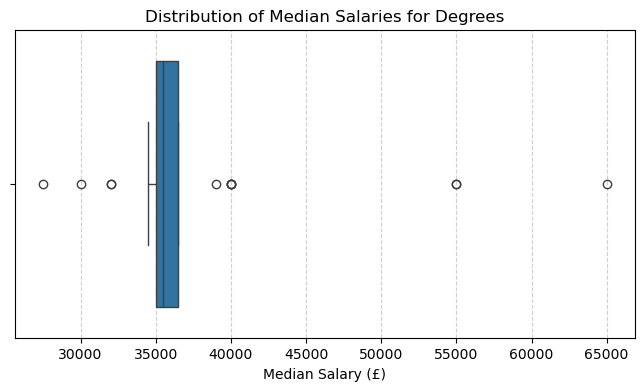

In [37]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=programms_df_clean['median_salary'])
plt.title('Distribution of Median Salaries for Degrees')
plt.xlabel('Median Salary (£)')
plt.grid(axis='x', linestyle='--', alpha=0.6) 
plt.show()

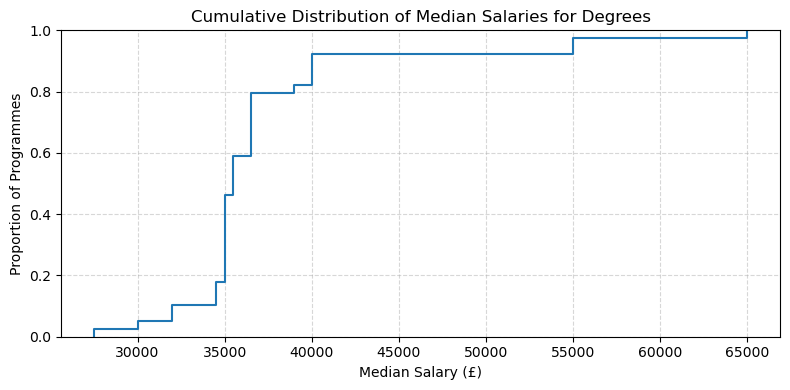

In [80]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.ecdfplot(data=programms_df_clean, x='median_salary')
plt.title('Cumulative Distribution of Median Salaries for Degrees')
plt.xlabel('Median Salary (£)')
plt.ylabel('Proportion of Programmes')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [41]:
top5 = programms_df_clean.nlargest(5, 'median_salary')[['degree', 'median_salary']]\
           .reset_index(drop=True)
bottom5 = programms_df_clean.nsmallest(5, 'median_salary')[['degree', 'median_salary']]\
              .reset_index(drop=True)

top5.columns = ['Top 5 Degrees', 'Top Salaries (£)']
bottom5.columns = ['Bottom 5 Degrees', 'Bottom Salaries (£)']

pd.concat([top5, bottom5], axis=1)

,Top 5 Degrees,Top Salaries (£),Bottom 5 Degrees,Bottom Salaries (£)
0,BSc Finance,65000.0,BSc International Relations,27500.0
1,BSc Econometrics and Mathematical Economics,55000.0,BSc Sociology,30000.0
2,BSc Economics,55000.0,BSc International Social and Public Policy,32000.0
3,BSc Financial Mathematics and Statistics,40000.0,BSc International Social and Public Policy wit...,32000.0
4,BSc Mathematics and Economics,40000.0,BA Anthropology and Law,34500.0


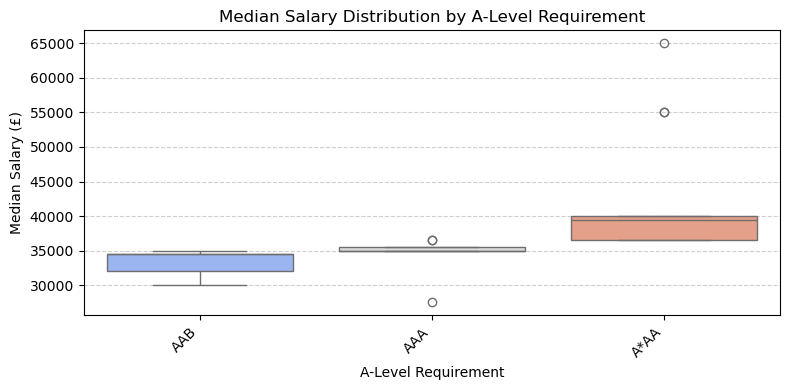

In [92]:
requirement_order = sorted(programms_df_clean['a_lvl_req'].unique(), reverse=True) 
plt.figure(figsize=(8,4))
sns.boxplot(data=programms_df_clean, x='a_lvl_req', y='median_salary', order=requirement_order, palette='coolwarm', hue='a_lvl_req', legend=False)

plt.title('Median Salary Distribution by A-Level Requirement')
plt.xlabel('A-Level Requirement')
plt.ylabel('Median Salary (£)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

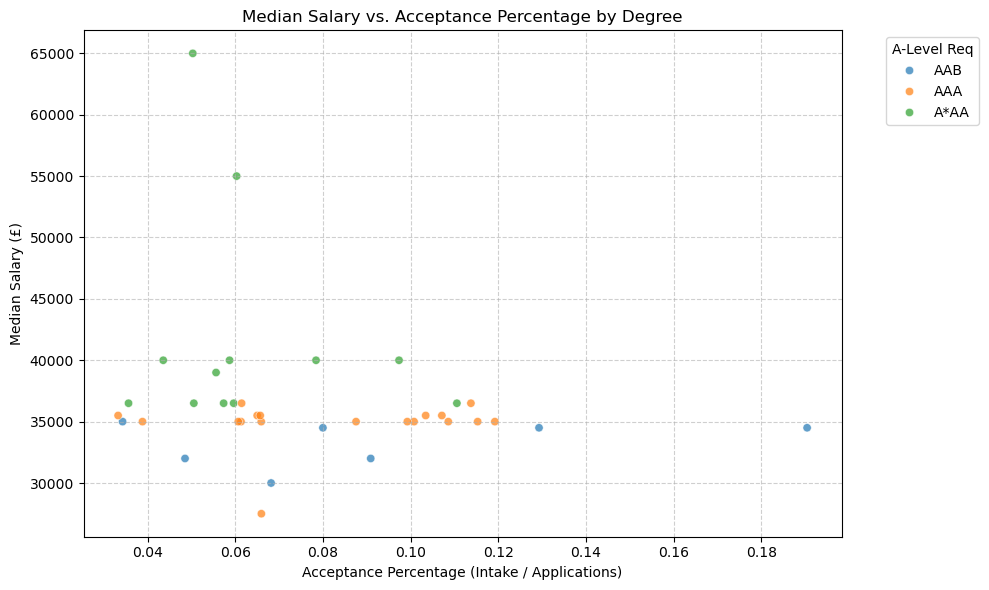

Correlation between Acceptance Percentage and Median Salary: -0.19


In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=programms_df_clean, x='acceptance_perc', y='median_salary', hue='a_lvl_req', alpha=0.7)

plt.title('Median Salary vs. Acceptance Percentage by Degree')
plt.xlabel('Acceptance Percentage (Intake / Applications)')
plt.ylabel('Median Salary (£)')
plt.grid(linestyle='--', alpha=0.6)
plt.legend(title='A-Level Req', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

correlation = programms_df_clean['acceptance_perc'].corr(programms_df_clean['median_salary'])
print(f"Correlation between Acceptance Percentage and Median Salary: {correlation:.2f}")